# Machine Learning Project

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
import matplotlib
import seaborn as sb
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import normalize
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from statistics import mode,mean,median
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import sklearn.model_selection
from sklearn.decomposition import PCA
import statistics
from scipy.io import arff
import decimal
import math
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Import Data

In [ ]:
data = pd.read_csv('Data_Modified.csv')

In [ ]:
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51'],
      dtype='object')

In [ ]:
arr = data.to_numpy()
X = arr[:,:-1]

Y= arr[:,-1].reshape(-1,1)

In [ ]:
Y.shape

(38463, 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_scores = {"2":0.9892813690403576, "3": 0.949709951805789, "4":0.8928418467779232,"5": 0.8573070103284393, "6":0.8210871862255634}

range_n_clusters = [7,8, 9,10,11]


for n_clusters in range_n_clusters:


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X[:,-1].reshape((-1,1)))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X[:,-1].reshape((-1,1)), cluster_labels)
    cluster_scores[f"{n_clusters}"] = silhouette_avg

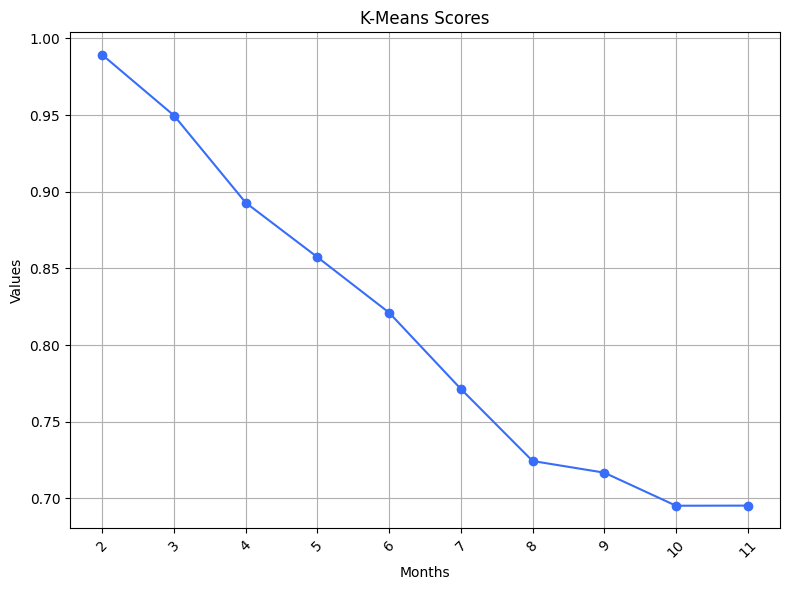

In [ ]:
import matplotlib.pyplot as plt

# Extracting keys and values from the dictionary
x_values = list(cluster_scores.keys())
y_values = list(cluster_scores.values())

# Creating the line plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Months')
plt.ylabel('Values')
plt.title('K-Means Scores')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


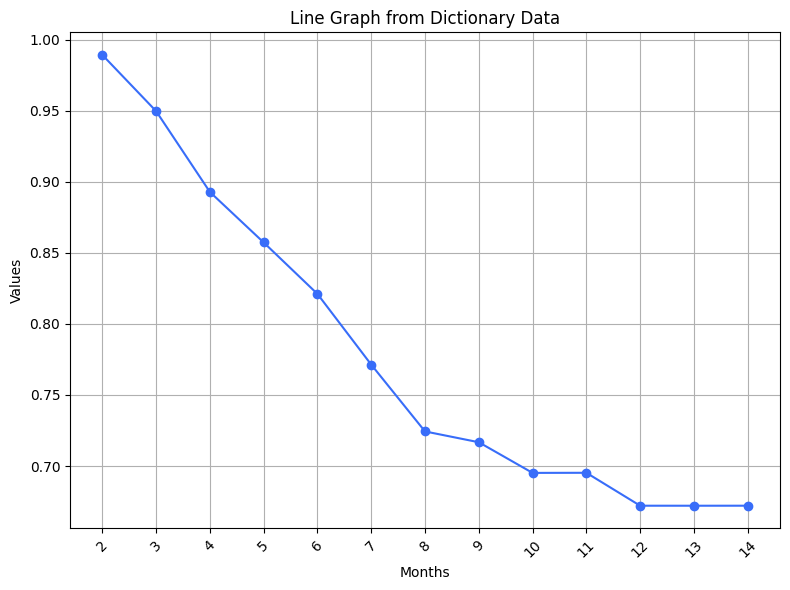

In [ ]:
import matplotlib.pyplot as plt

# Extracting keys and values from the dictionary
x_values = list(cluster_scores.keys())
y_values = list(cluster_scores.values())

# Creating the line plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Line Graph from Dictionary Data')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import sklearn.preprocessing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = LocalOutlierFactor()
clf.fit(X_train)
outliers = clf.fit_predict(X_train)

In [ ]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
X_aug = X_train
Y_aug = np.array(Y_train)
Y_aug.reshape((-1,1))
delete =0
for i in range(X_train.shape[0]):
    if(outliers[i]==-1):
        X_aug = np.delete(X_aug,i-delete,axis=0)
        Y_aug = np.delete(Y_aug,i-delete,axis=0)
        delete+=1

In [ ]:
X_test.shape

(7693, 52)

In [ ]:
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# clf = LinearDiscriminantAnalysis(n_components=4)
# clf.fit(X_train, Y_train)
# X_train = clf.transform(X_train)
# X_test = clf.transform(X_test)

In [ ]:
X.shape

(38463, 52)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 70, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,5]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
clf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, cv = 3, verbose=2, random_state=42)
rf_random.fit(X_train,Y_train)

rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: ignored

In [ ]:
clf = RandomForestClassifier(n_estimators=200,
 min_samples_split=2,
 min_samples_leaf=1,
 max_features='auto',
 max_depth= None,
 bootstrap= True)
clf.fit(X_train,Y_train)
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(gnb, X_train, Y_train, cv=5)
# scores.mean()
Y_predict = clf.predict(X_test)

<ipython-input-243-bd39217faa05>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,Y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
scores.mean()

0.8924601884952876

In [ ]:
freq = {1:0,2:0,3:0,4:0}
for i in range(Y_train.shape[0]):
  freq[Y_train[i,0]]+=1
freq

In [ ]:
# Number of trees in random forest
# Number of features to consider at every split
n_neighbors = [5,math.sqrt(Y_train.shape),Y_train.shape/2]
# Maximum number of levels in tree
weights = ['uniform', 'distance']
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,5]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
clf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, cv = 3, verbose=2, random_state=42)
rf_random.fit(X_train,Y_train)

rf_random.best_params_

TypeError: ignored

In [ ]:
gnb = GaussianNB().fit(X_train, Y_train)
Y_predict = gnb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_test.shape

In [ ]:
# Number of trees in random forest
# Number of features to consider at every split
n_neighbors = [5,int(math.sqrt(Y_train.shape[0])),int(Y_train.shape[0]/2)]
# Maximum number of levels in tree
weights = ['uniform', 'distance']
leaf_size = [10,30,100,500]
# Minimum number of samples required to split a node
p = [1,2]
# Create the random grid
random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'leaf_size': leaf_size,
               'p': p}
clf = KNeighborsClassifier()
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, cv = 3, verbose=2, random_state=42)
rf_random.fit(X_train,Y_train)

rf_random.best_params_

In [ ]:
neigh = KNeighborsClassifier(weights = 'uniform', p = 1, n_neighbors = 175, leaf_size = 500)
# clf = BaggingClassifier(estimator=neigh,n_estimators=10, random_state=0)
# clf.fit(X_train,Y_train)
neigh.fit(X_train, Y_train)
Y_predict = neigh.predict(X_test)

In [ ]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predict)

1.0

In [ ]:
from sklearn.metrics import precision_score, recall_score, classification_report
precision = precision_score(Y_test, Y_predict, average='weighted')
recall = recall_score(Y_test, Y_predict, average='weighted')

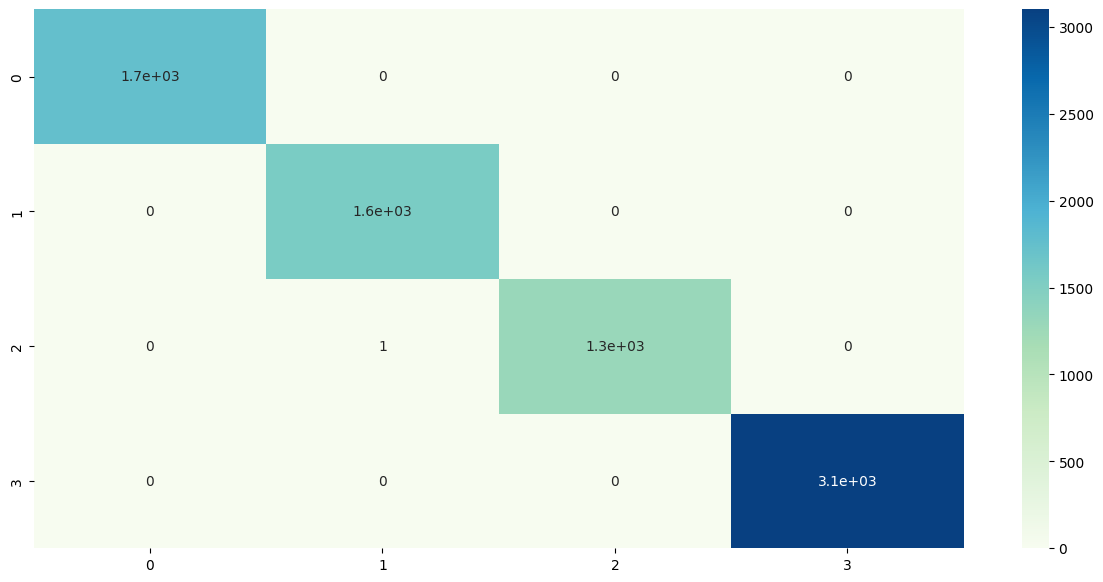

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set_palette("rainbow")
plt.figure(figsize = (15,7))
sns.heatmap(confusion_matrix(Y_test, Y_predict),annot=True,cmap="GnBu");

In [ ]:
precision